# Hands-on session: Machine Learning & Data Visualization
---
## 1 - Preliminary preparations
---


How do I run this?

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sina-mansour/OHBM-Brainhack-2021)

Gitpod?

Binder?

---

package installation for google colab:

In [ ]:
# install required packages for colab
!pip install -r ../colab/requirements.txt


---

Loading packages

In [36]:
# pandas for data handling
import pandas as pd

# matplotlib and seaborn for data visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# setup inline plotting for jupyter
%matplotlib inline

# numpy for mathematical operations of data
import numpy as np

# nilearn and nibabel for handling neuroimaging data
import nilearn.datasets as nidata
import nilearn.plotting as niplot
import nibabel as nib



---

## Dataset we're using:

- The ABIDE dataset files sourced from [Neurohackacademy's git repository](https://github.com/neurohackademy/nh2020-curriculum/tree/master/tu-machine-learning-yarkoni). This data was originally used in [Tal Yarkoni's ML tutorial](https://www.youtube.com/watch?v=zvd8M8dwHxM).

The data comes from the [Autism Brain Imaging Data Exchange II](http://fcon_1000.projects.nitrc.org/indi/abide/abide_II.html) (ABIDE II) project. ABIDE is a long-running effort to advance understanding of autism by aggregating and sharing autism-related structural and functional imaging datasets from around the world.

It's allready downloaded and saved in the data directory. So we could directly open in with pandas.


In [17]:
# load the data from file

# # this data could be downloaded from the souce with the command bellow:
# data = pd.read_csv('https://github.com/neurohackademy/nh2020-curriculum/raw/master/tu-machine-learning-yarkoni/data/abide2.tsv', sep='\t')

# The data is already downloaded to the git repository files, so no need to download again
data = pd.read_csv('../data/abide2.tsv', sep='\t')



---
## Handling dat with Pandas

Pandas is the powerhorse package in handling datasets in python. It can be used for data preprocessing, cleaning, analyses, and storage.

Pandas stores the data in a tabular format called a dataframe.

We could check the contents of this dataframe using the `head` function to get a sense of what data we're looking at:


In [15]:
data.head()


,site,subject,age,age_resid,sex,group,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,ABIDEII-KKI_1,29293,8.893151,13.642852,2.0,1.0,2750.0,306.0,354.0,2123.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,ABIDEII-OHSU_1,28997,12.000000,16.081732,2.0,1.0,2836.0,186.0,354.0,2261.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,ABIDEII-GU_1,28845,8.390000,12.866264,1.0,2.0,3394.0,223.0,373.0,2827.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,ABIDEII-NYU_1,29210,8.300000,13.698139,1.0,1.0,3382.0,266.0,422.0,2686.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,ABIDEII-EMC_1,29894,7.772758,14.772459,2.0,2.0,3080.0,161.0,346.0,2105.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128


Every row represents a different person, and every column represents a different variable. In machine learning terminology, we typically refer to the rows and columns as **samples** and **features**, respectively. We can thus think of our data as a two-dimensional $n$ (samples) x $p$ (features) matrix. The vast majority of algorithms implemented in the scikit-learn package expect to receive numerical matrices of this kind as their primary inputs.

#### Demographic/phenotypic data
The columns in the dataframe come from two sources. The first 6 columns contain basic demographic/phenotypic information taken directly from the Composite Phenotypic File on the [ABIDE II project website](http://fcon_1000.projects.nitrc.org/indi/abide/abide_II.html). The most important demographic features are **age**, which will serve as the target of most of our predictive modeling efforts, and **group**, which displays the diagnosis group (1 = autism, 2 = control).

#### Brain data
The other 1,440 columns contain structural brain features extracted from the ABIDE II subjects' MRI scans using the [FreeSurfer](https://surfer.nmr.mgh.harvard.edu/) software package.  These come courtesy of Richard Bethlehem, who has shared these extracted features on a [GitHub repository](https://github.com/rb643/Normative_modeling). The data are used in an under-review paper; at present the citation is:

> Richard A.I. Bethlehem, Jakob Seidlitz, Rafael Romero-Garcia, Guillaume Dumas, & Michael V. Lombardo. (2018, August 1). Normative age modelling of cortical thickness in autistic males (Version V2.1). Zenodo. http://doi.org/10.5281/zenodo.1325171

The 1,440 features represent 4 sets of 360 features. The 4 variables extracted by FreeSurfer are surface area, volume, cortical thickness, and [local gyrification index](https://surfer.nmr.mgh.harvard.edu/fswiki/LGI). For each feature, there are 360 variables, representing the 360 parcels in the [Human Connectome Project Multi-Modal Parcellation atlas](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4990127/) (HCP-MMP1).

Here's a closer look at this parcellation:

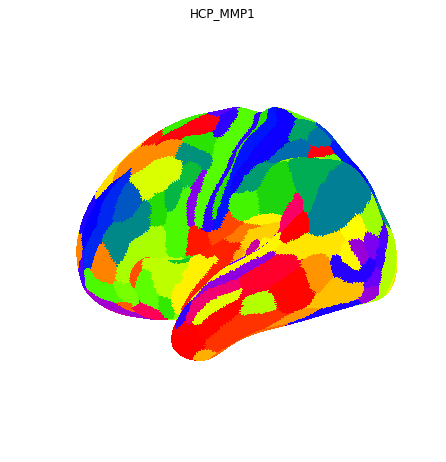

In [41]:
fig = plt.figure(figsize=(6, 6))
out = niplot.plot_surf_roi("../data/left_inflated.surf.gii", "../data/left_HCP_MMP1.label.gii", cmap='prism', figure=fig, title="HCP_MMP1")


This visualization was generated using the nilearn's plotting packages. We'll have a closer look at this later in the data visualization section. If you like to check out other possible cortical visualizations that nilearn can handle, make sure to check [this link](https://nilearn.github.io/plotting/index.html).

---
## Inspecting the data

Let's have a look at some basic plots to understand the data better.


<AxesSubplot:xlabel='age', ylabel='Count'>

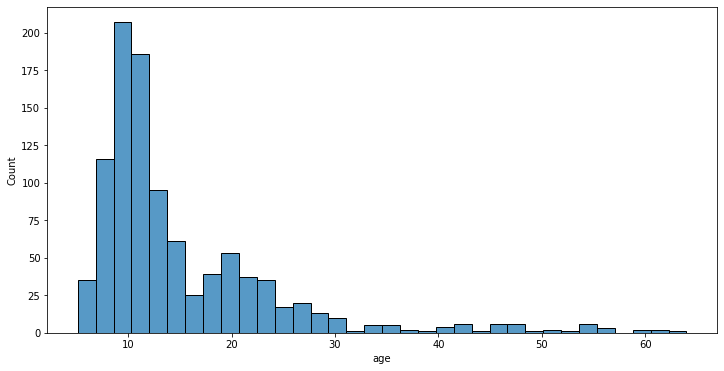

In [46]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=data, x='age', ax=ax)

<AxesSubplot:xlabel='group', ylabel='age'>

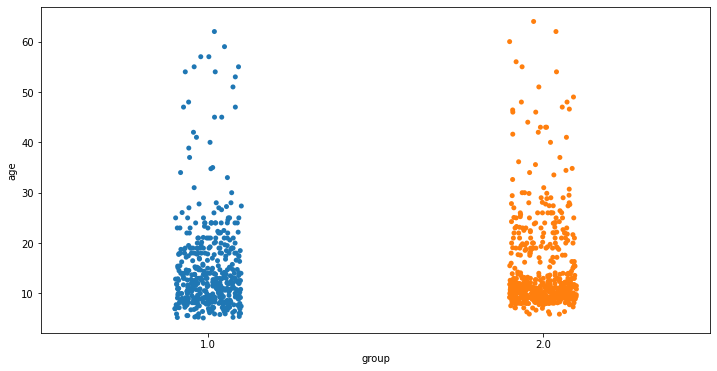

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.stripplot(data=data, x='group', y='age', ax=ax)

Now that we have the preliminaries out of the way, and have some data to play with, we can start doing machine learning!